In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Data Processing and EDA

In [2]:
#read in data
all_fund = pd.read_csv('all_companies_fund.csv') #2000-2019
all_bank = pd.read_csv('all_bankruptcies.csv', encoding = "ISO-8859-1") #2000-2019

C:\Users\Derrick\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,33,37,955,956,957,962,972,976,977,982) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Derrick\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (263,341) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#keys to join all databases
key_table = all_fund[['cik', 'GVKEY']] 
key_table = key_table.drop_duplicates()
key_table.head()

,cik,GVKEY
0,1750.0,1004
19,910627.0,1010
23,61478.0,1013
34,2668.0,1019
36,319126.0,1021


In [4]:
mask = all_fund['stalt'] == 'TL'
tl = all_fund[mask]
tl

,GVKEY,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,datadate,fyear,...,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
73,1045,P,01,NR,NaN,NaN,01/05/2012,11/30/2013,12/31/2012,2012.0,...,4.0,4512,605.0,600.0,B-,TX,0.0,www.aa.com,NaN,NaN
473,1164,P,01,NR,NaN,NaN,07/30/2002,03/31/2004,12/31/2002,2002.0,...,10.0,4813,463.0,974.0,NaN,NJ,0.0,www.wcom.com/home.shtml,01/09/2006,NaN
867,1263,N,01C,NU,NaN,NaN,12/01/2000,12/31/2001,12/31/2001,2001.0,...,6.0,3312,460.0,970.0,NaN,ON,2.0,www.algoma.com,NaN,NaN
868,1263,P,01,NR,NaN,NaN,12/01/2000,01/31/2002,12/31/2001,2001.0,...,6.0,3312,460.0,970.0,NaN,ON,2.0,www.algoma.com,NaN,NaN
1167,1388,C,00X,NU,NaN,NaN,01/01/1983,E,12/31/2011,2011.0,...,1.0,4512,605.0,600.0,NaN,TX,1.0,www.aa.com,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236932,273726,P,01,LC,93338.0,53385.0,04/15/2010,06/30/2018,12/31/2017,2017.0,...,2.0,1381,NaN,NaN,NaN,NaN,0.0,www.seadrill.com,NaN,04/15/2010
237802,294524,C,00X,NR,NaN,NaN,01/01/2006,04/29/2010,12/31/2009,2009.0,...,1.0,2820,NaN,NaN,B+,NaN,0.0,www.lyondellbasell.com,NaN,NaN
237889,296944,N,01,NR,NaN,NaN,01/29/2014,E,12/31/2017,2017.0,...,2.0,1381,NaN,NaN,NaN,NaN,3.0,www.nadlcorp.com,07/03/2018,NaN
237890,296944,P,02,LC,14417.0,54709.0,01/29/2014,07/03/2018,12/31/2017,2017.0,...,2.0,1381,NaN,NaN,NaN,NaN,3.0,www.nadlcorp.com,07/03/2018,NaN


In [5]:
all_fund[all_fund['GVKEY'] == 273726][['datadate','stalt','cik']]

,datadate,stalt,cik
236923,12/31/2008,NaN,1737706.0
236924,12/31/2009,NaN,1737706.0
236925,12/31/2010,NaN,1737706.0
236926,12/31/2011,NaN,1737706.0
236927,12/31/2012,NaN,1737706.0
236928,12/31/2013,NaN,1737706.0
236929,12/31/2014,NaN,1737706.0
236930,12/31/2015,NaN,1737706.0
236931,12/31/2016,NaN,1737706.0
236932,12/31/2017,TL,1737706.0


In [6]:
all_bank[all_bank['COMPANY_FKEY'] == 1737706]

,BANK_KEY,SUBSID_NAME,BANKRUPTCY_TYPE,LAW_COURT_FKEY,COURT_TYPE_CODE,COURT_NAME,COURT_S_NAME,COURT_LOC_STREET,COURT_LOC_CITY,COURT_LOC_STATE,...,HIWATER_INCMST_REVFY,HIWATER_INCMST_NETINC_QTR_DATE,HIWATER_INCMST_NETINC_QTR,HIWATER_INCMST_NETINC_TTM_DATE,HIWATER_INCMST_NETINC_TTM,HIWATER_INCMST_NETINC_FY_DATE,HIWATER_INCMST_NETINC_FY,NAME_CHANGE_DATE1,NAME_CHANGE_DATE2,NAME_CHANGE_DATE3


## Bankruptcy Data EDA

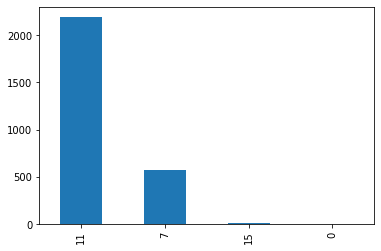

In [7]:
all_bank['BANKRUPTCY_TYPE'].value_counts().plot(kind = 'bar')

In [8]:
#extract useful information
all_bank = all_bank[['BANKRUPTCY_TYPE', 'BANK_BEGIN_DATE', 'SIC_CODE_FKEY', 'SIC_CODE_DESCRIP', 'NAICS_CODE_DESCRIP', 'NAICS_CODE_FKEY', 'SHORT_NAME', 'NAME', 'COMPANY_FKEY']]

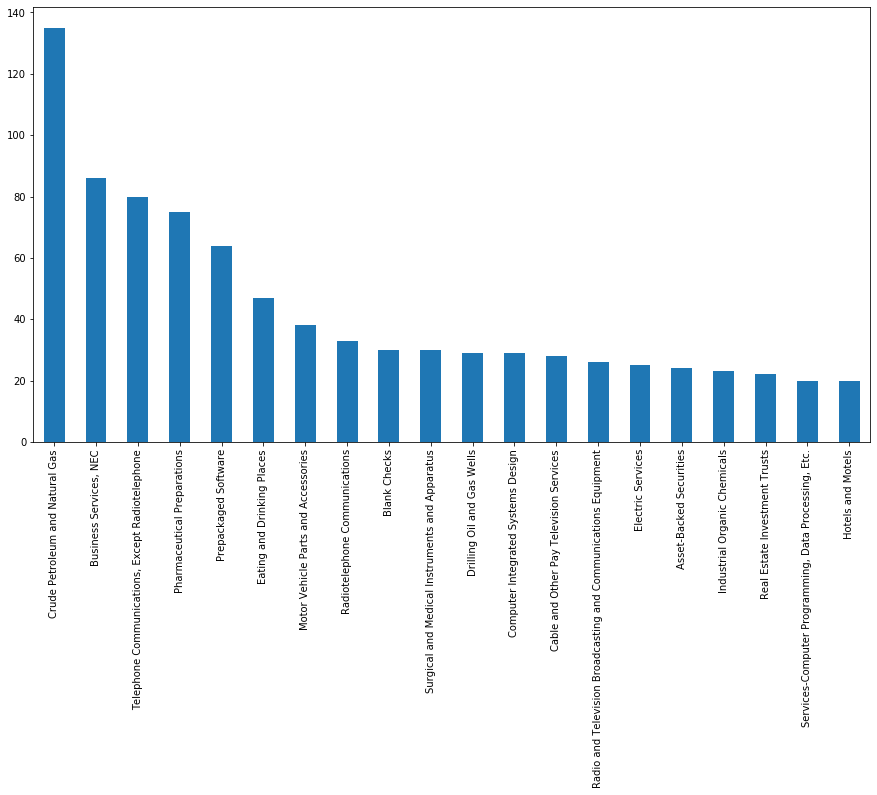

In [9]:
#top 20 industries with most bankruptcies using SIC code

all_bank['SIC_CODE_DESCRIP'].value_counts(ascending = False)[:20].plot(kind = 'bar', figsize = (15,8))

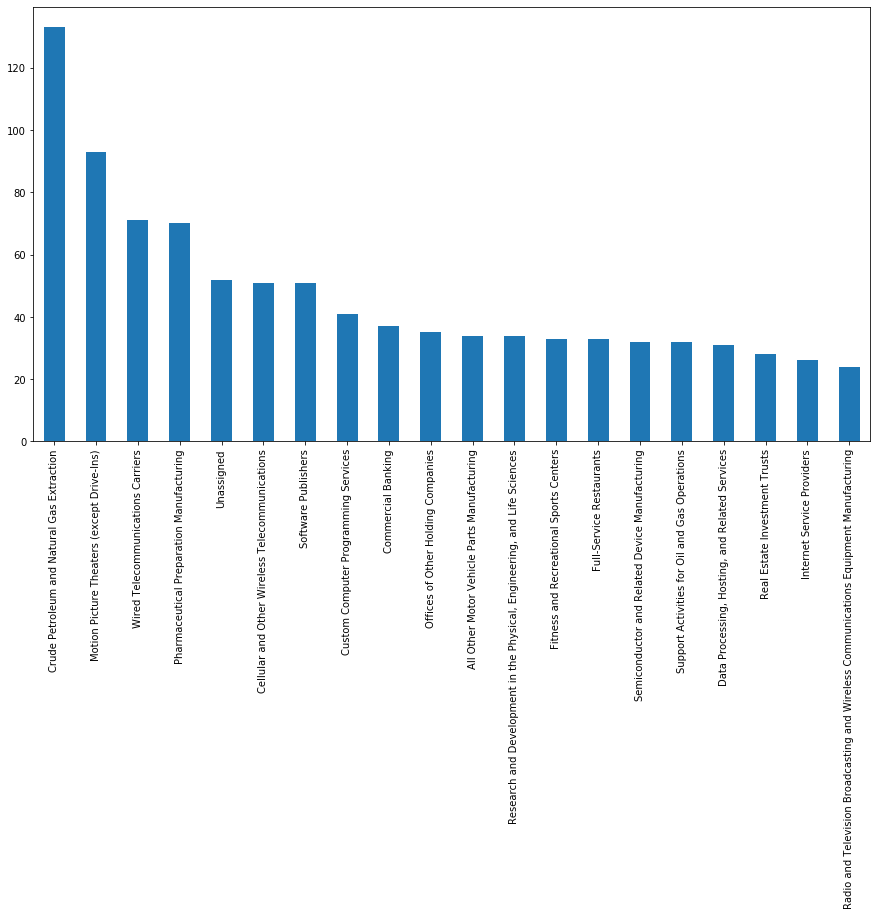

In [10]:
#top 20 industries with most bankruptcies using NICS code

all_bank['NAICS_CODE_DESCRIP'].value_counts(ascending = False)[:20].plot(kind = 'bar', figsize = (15,8))

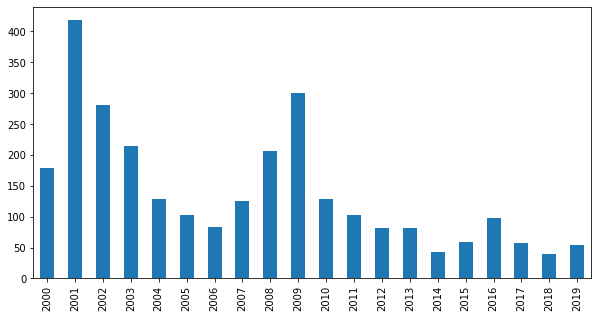

In [11]:
all_bank['year'] = pd.to_datetime(all_bank['BANK_BEGIN_DATE']).dt.year
all_bank['year'].value_counts().sort_index().plot(kind = 'bar', figsize = (10,5))

In [12]:
# gvkey_list = str(list(all_fund['GVKEY'].unique())).strip('\'').strip('[').strip(']').split(', ')

# # Write to txt file to look up relevant companies in Audit Analytics database
# # file = open('all_GVKEY.txt','w')
# # for i in all_fund['GVKEY']:
# #     file.write(str(i))
# #     file.write('\n')
# # file.close()

print(all_fund['GVKEY'].nunique(), 'of unique GVKEYs')
print(all_fund['cik'].nunique(), 'of unique ciks')
print('cik is the only way to join to bankruptcy data, might explain why so many bankruptcies were dropped')

24933 of unique GVKEYs
17998 of unique ciks
cik is the only way to join to bankruptcy data, might explain why so many bankruptcies were dropped


In [13]:
# all_bank.groupby(['year', 'NAICS_CODE_DESCRIP'])[['NAICS_CODE_DESCRIP']].count().unstack().to_csv('industrybank.csv')

In [14]:
# all_bank.groupby(['year', 'SIC_CODE_DESCRIP'])[['NAICS_CODE_DESCRIP']].count().unstack().to_csv('sicbank.csv')

In [15]:
all_bank.shape

(2779, 10)

In [16]:
f_keys = list(all_bank['COMPANY_FKEY'])

In [17]:
ciks = list(key_table['cik'])

In [18]:
#test how many bankrupt Fkeys are in fundamental
x = [] 
for i in f_keys:
    
    if i in ciks:
        continue
    
    else:
        x.append(i)
        print (i, 'not in fundamental')

3662 not in fundamental
3941 not in fundamental
4707 not in fundamental
5588 not in fundamental
6948 not in fundamental
8109 not in fundamental
12105 not in fundamental
13156 not in fundamental
18530 not in fundamental
23778 not in fundamental
23778 not in fundamental
27960 not in fundamental
28761 not in fundamental
30419 not in fundamental
30419 not in fundamental
34879 not in fundamental
40730 not in fundamental
43960 not in fundamental
45791 not in fundamental
46601 not in fundamental
47968 not in fundamental
53453 not in fundamental
56824 not in fundamental
57201 not in fundamental
59401 not in fundamental
60064 not in fundamental
60064 not in fundamental
65202 not in fundamental
67199 not in fundamental
70412 not in fundamental
72655 not in fundamental
75234 not in fundamental
76741 not in fundamental
79839 not in fundamental
82925 not in fundamental
87888 not in fundamental
94026 not in fundamental
94601 not in fundamental
96294 not in fundamental
97579 not in fundamental
99321 

1048845 not in fundamental
1049618 not in fundamental
1049620 not in fundamental
1049889 not in fundamental
1050119 not in fundamental
1050835 not in fundamental
1051254 not in fundamental
1051381 not in fundamental
1052245 not in fundamental
1054524 not in fundamental
1054748 not in fundamental
1054992 not in fundamental
1055131 not in fundamental
1055684 not in fundamental
1056286 not in fundamental
1057725 not in fundamental
1057827 not in fundamental
1057831 not in fundamental
1057834 not in fundamental
1057836 not in fundamental
1058627 not in fundamental
1058628 not in fundamental
1058629 not in fundamental
1058631 not in fundamental
1058767 not in fundamental
1058956 not in fundamental
1059363 not in fundamental
1059364 not in fundamental
1059567 not in fundamental
1059570 not in fundamental
1059572 not in fundamental
1059573 not in fundamental
1059576 not in fundamental
1059706 not in fundamental
1059838 not in fundamental
1059888 not in fundamental
1060242 not in fundamental
1

1293379 not in fundamental
1293385 not in fundamental
1294148 not in fundamental
1294208 not in fundamental
1294371 not in fundamental
1294476 not in fundamental
1296595 not in fundamental
1296937 not in fundamental
1300744 not in fundamental
1302502 not in fundamental
1302977 not in fundamental
1304588 not in fundamental
1305464 not in fundamental
1305468 not in fundamental
1305748 not in fundamental
1307697 not in fundamental
1309126 not in fundamental
1309237 not in fundamental
1309499 not in fundamental
1310527 not in fundamental
1311953 not in fundamental
1314361 not in fundamental
1314642 not in fundamental
1319842 not in fundamental
1319845 not in fundamental
1319855 not in fundamental
1320459 not in fundamental
1320460 not in fundamental
1320462 not in fundamental
1320463 not in fundamental
1320465 not in fundamental
1320467 not in fundamental
1320468 not in fundamental
1320475 not in fundamental
1320476 not in fundamental
1320477 not in fundamental
1321099 not in fundamental
1

In [20]:
# # gvkey_list = str(list(all_fund['GVKEY'].unique())).strip('\'').strip('[').strip(']').split(', ')

# # Write to txt file to look up relevant companies in Audit Analytics database
# file = open('all_fkey.txt','w')
# for i in all_bank['COMPANY_FKEY']:
#     file.write(str(i))
#     file.write('\n')
# file.close()

In [21]:
#used bankruptcy Fkey to query fundamental data, turns out a lot of ciks do not return fundamental data
fund_bank = pd.read_csv('fund_bank.csv')
fund_bank['cik'].nunique()

C:\Users\Derrick\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (23,33,955,956,958,959,965,976,977,980,981,982,983,985,989,995,996,999,1002,1005,1010,1017,1018,1021,1025,1030,1033,1034,1039,1049,1050,1055,1056,1057,1058,1059,1060,1061,1065,1066,1069,1070,1072,1074,1076,1077,1081,1082,1083,1093,1095,1099,1100,1107,1111,1112,1113,1114,1116,1120,1127,1134,1137,1141,1144,1145,1146,1148,1149,1150,1159,1160,1162,1163,1164,1165,1167,1168,1829,1830,1836,1850,1851) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1798

In [22]:
print('will move forward with the companies with fundamental data')
print('might be benefitial to figure out why so many companies do not have fundamental data')

will move forward with the companies with fundamental data
might be benefitial to figure out why so many companies do not have fundamental data


## Merge fundamental and bankruptcy and financial ratios


In [23]:
fund_bank = pd.merge(all_fund, all_bank, left_on = 'cik', right_on = 'COMPANY_FKEY', suffixes = ('_fund', '_bank'), how = 'left')
fund_bank['cik'].nunique()

17998

In [24]:
bankrupt_key  = pd.merge(all_bank, key_table, left_on = 'COMPANY_FKEY', right_on = 'cik', suffixes = ('_ratio', '_key'), how = 'inner')


In [25]:
all_fin_ratios  = pd.read_csv('all_fin_ratios.csv')

In [26]:
#only keep year end financial ratios for each company
all_fin_ratios=all_fin_ratios.drop_duplicates(subset=['gvkey','qdate'], keep='last')
all_fin_ratios['qmonth']=pd.to_datetime(all_fin_ratios['qdate']).dt.month
mask= all_fin_ratios['qmonth']==12
all_fin_ratios= all_fin_ratios[mask]

all_fin_ratios.shape

(75263, 76)

In [27]:
fin_gv = list(all_fin_ratios['gvkey'].unique())

fund_gv = list(all_fund['GVKEY'].unique())

#test how many bankrupt Fkeys are in fundamental
x = [] 
for i in fin_gv:
    
    if i in fund_gv:
        continue
    
    else:
        x.append(i)
        print (i, 'not in fundamental')

1411 not in fundamental
1542 not in fundamental
3391 not in fundamental
4806 not in fundamental
5181 not in fundamental
6282 not in fundamental
7503 not in fundamental
7837 not in fundamental
8248 not in fundamental
11768 not in fundamental
13486 not in fundamental
14825 not in fundamental
17164 not in fundamental
17560 not in fundamental
18693 not in fundamental
18769 not in fundamental
18914 not in fundamental
22525 not in fundamental
23692 not in fundamental
24779 not in fundamental
25271 not in fundamental
29402 not in fundamental
29982 not in fundamental
30240 not in fundamental
30599 not in fundamental
30757 not in fundamental
30764 not in fundamental
31097 not in fundamental
61606 not in fundamental
62004 not in fundamental
62069 not in fundamental
62338 not in fundamental
62450 not in fundamental
62513 not in fundamental
63207 not in fundamental
64509 not in fundamental
64996 not in fundamental
65629 not in fundamental
65667 not in fundamental
65882 not in fundamental
65936 not

61590 not in fundamental
61601 not in fundamental
61700 not in fundamental
61705 not in fundamental
61780 not in fundamental
61873 not in fundamental
61999 not in fundamental
62137 not in fundamental
62284 not in fundamental
62314 not in fundamental
62320 not in fundamental
62356 not in fundamental
62368 not in fundamental
62377 not in fundamental
62433 not in fundamental
62519 not in fundamental
62535 not in fundamental
62659 not in fundamental
62690 not in fundamental
62697 not in fundamental
62707 not in fundamental
62737 not in fundamental
62759 not in fundamental
62932 not in fundamental
63013 not in fundamental
63140 not in fundamental
63182 not in fundamental
63199 not in fundamental
63200 not in fundamental
63201 not in fundamental
63225 not in fundamental
63278 not in fundamental
63296 not in fundamental
63478 not in fundamental
63509 not in fundamental
63641 not in fundamental
63693 not in fundamental
63744 not in fundamental
63770 not in fundamental
63775 not in fundamental


In [28]:
print('Of', len(fin_gv), 'companies with financial ratios', len(x), 'companies are not in fundamental dataset')

Of 9466 companies with financial ratios 560 companies are not in fundamental dataset


In [29]:
fin_ratio_bankruptcy = pd.merge(all_fin_ratios, bankrupt_key, left_on = 'gvkey', right_on = 'GVKEY', suffixes = ('_finratio', '_bankrupt'), how = 'left')


In [30]:
mask = pd.to_datetime(fin_ratio_bankruptcy['adate']).dt.year + 1 == pd.to_datetime(fin_ratio_bankruptcy['BANK_BEGIN_DATE']).dt.year

fin_ratio_bankruptcy['bankrupted'] = np.where(mask, 1,0)

In [31]:
#might want to check why so few bankruptcies exist in this final merge dataset
fin_ratio_bankruptcy['bankrupted'].sum()

518

In [32]:
fin_ratio_bankruptcy['year'] = pd.to_datetime(fin_ratio_bankruptcy['adate']).dt.year
all_fund['year'] =  pd.to_datetime(all_fund['datadate']).dt.year


In [33]:
fund_ratio_bank  = pd.merge(all_fund, fin_ratio_bankruptcy, left_on = ['GVKEY', 'year'], right_on = ['gvkey', 'year'], suffixes = ('_fund', '_ratio'), how = 'inner')
fund_ratio_bank = fund_ratio_bank.drop(columns = 'GVKEY_ratio')
fund_ratio_bank = fund_ratio_bank.rename(columns = {'GVKEY_fund' : 'GVKEY'})

In [34]:
print('The final dataset includes:',fund_ratio_bank['GVKEY'].nunique(), 'companies, which have fundamental as well as financial ratios values, and', fund_ratio_bank['bankrupted'].sum(), 'bankruptcies')

The final dataset includes: 8673 companies, which have fundamental as well as financial ratios values, and 511 bankruptcies


## Final EDA

In [35]:
#filter for market cap size (in MM)
#recommend using this after creating bankruptcy dummy

def market_cap_size(df, lower, upper):
    
    mask = ((df['mkvalt'] >=lower) & (df['mkvalt'] <=upper))
    df =df[mask]
    
    return df


# #market cap 500M - 1B
# df500 = market_cap_size(fund_ratio_bank, 0,1000)

# df500['GVKEY'].nunique()

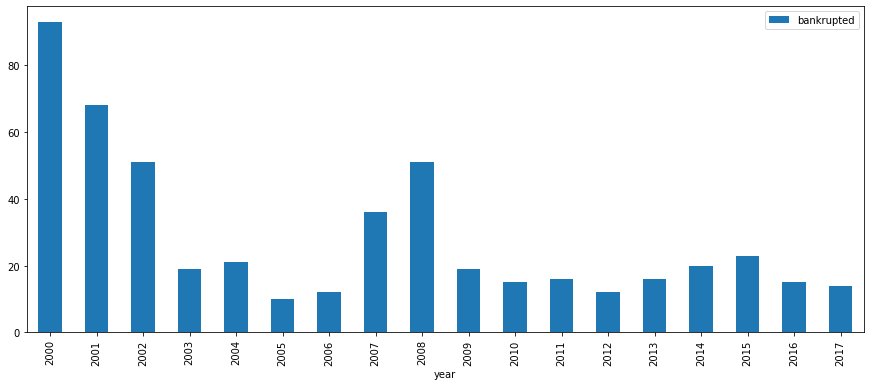

In [36]:
fund_ratio_bank.groupby('year')[['bankrupted']].sum().plot(kind = 'bar', figsize = (15,6))

In [37]:
final_bank = fund_ratio_bank [fund_ratio_bank['bankrupted']==1]

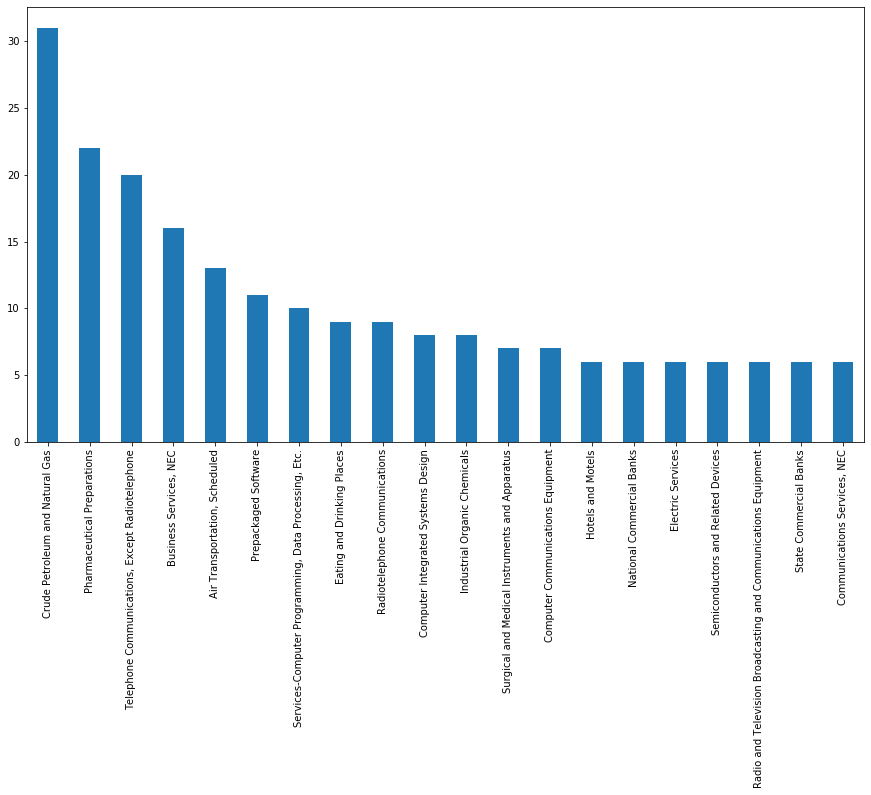

In [38]:
final_bank['SIC_CODE_DESCRIP'].value_counts(ascending = False)[:20].plot(kind = 'bar', figsize = (15,8))

most bankrptcies happened with companies with small market caps


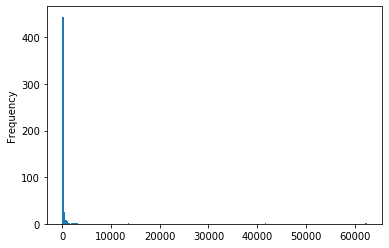

In [39]:
#bankrupt companies usually have small market caps
final_bank['mkvalt'].plot(kind = 'hist', bins = 200)#.value_counts(ascending = False)[:20].plot(kind = 'bar', figsize = (15,8))
print('most bankrptcies happened with companies with small market caps')

## Next steps:
1. figure out why so many bankrupted companies do not have fundamental data (is it how the database was constructed? fundamental dataset would get rid of bankrupted or acquired companies?)

2. figure out why only 500 or so bankruptcies exist in the final dataset, down from 1000 (bankrupt companies with fundamental data) --> hypothesis is some fin ratios companies do not have fundamental data and those happen to be the ones with bankrupt data. Need to check 

3. model development. Note that the current dataset includes data from 2000 - 2019. Need to filter out dates


# Modeling

In [40]:
mask = (fund_ratio_bank['fyear'] >= 2000) & (fund_ratio_bank['fyear'] <= 2010)

df_2000_2010 = fund_ratio_bank[mask]

In [41]:
mask = (fund_ratio_bank['fyear'] == 2011)

df_2011 = fund_ratio_bank[mask]

In [42]:
lista=[]
for i in all_fin_ratios.columns:
    lista.append(i)

In [43]:
lista.append('bankrupted')
lista.append('fyear')

In [44]:
df_2000_2010 = df_2000_2010[lista]
df_2011 = df_2011[lista]


In [45]:
df_2000_2010 = df_2000_2010.drop(columns = ['gvkey'])
df_2011 = df_2011.drop(columns = ['gvkey'])

In [46]:
mask = (df_2000_2010['fyear'] >= 2000) & (df_2000_2010['fyear'] <= 2007)
train=df_2000_2010[mask]
test= df_2000_2010[-mask]

In [47]:
y_train= train['bankrupted']
x_train= train.drop(columns=['bankrupted'])
y_test= test['bankrupted']
x_test= test.drop(columns=['bankrupted'])

In [48]:
x_train=x_train.drop(columns=['adate','qdate','fyear','public_date','qmonth'])
x_test=x_test.drop(columns=['adate','qdate','fyear','public_date','qmonth'])

In [49]:
def get_pct(column):
    
    column = float(str(column).rstrip('%')) 
    
    return column

x_train['DIVYIELD'] = x_train['DIVYIELD'].apply(get_pct)
x_test['DIVYIELD'] = x_test['DIVYIELD'].apply(get_pct)

# Model Model Derrikc you dumb

In [50]:
x_train = x_train.astype(str)
x_test = x_test.astype(str)
y_train = y_train.astype(str)
y_test = y_test.astype(str)

In [51]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, roc_auc_score


In [52]:
model = CatBoostClassifier(
    iterations=5,
    learning_rate=0.07736700028181076,
    scale_pos_weight=99
    # loss_function='CrossEntropy'
)
categorical_features_indices = np.where(x_train.dtypes != np.float)[0]

model.fit(
    x_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(x_test, y_test),
    verbose=False
)

In [53]:
# Get predicted classes
preds_class = model.predict(x_test)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(x_test)
# Get predicted RawFormulaVal
preds_raw = model.predict(x_test, prediction_type='RawFormulaVal')

In [54]:
accuracy_score(preds_class,y_test)

0.8297136778654375

In [55]:
preds_class= pd.Series(preds_class)

In [59]:
# precision tp / (tp + fp)
precision = precision_score(y_test, preds_class, pos_label='1')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, preds_class,pos_label='1')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, preds_class,pos_label='1')
print('F1 score: %f' % f1)
roc = roc_auc_score(y_test.astype(int), preds_class.astype(int))
print('AUC_ROC: %f' % roc)

Precision: 0.037821
Recall: 0.852273
F1 score: 0.072429
AUC_ROC: 0.840905


In [59]:
model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'approx_on_full_history': False,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Unif

# Tuning the fucking parameter

f1list=[]

for x in range(0,200):
    model = CatBoostClassifier(
        iterations=5,
        learning_rate=0.1,
        scale_pos_weight=x
        # loss_function='CrossEntropy'
    )
    categorical_features_indices = np.where(x_train.dtypes != np.float)[0]

    model.fit(
        x_train, y_train,
        cat_features=categorical_features_indices,
        eval_set=(x_test, y_test),
        verbose=False
    )
    # Get predicted classes
    preds_class = model.predict(x_test)
    # Get predicted probabilities for each class
    preds_proba = model.predict_proba(x_test)
    # Get predicted RawFormulaVal
    preds_raw = model.predict(x_test, prediction_type='RawFormulaVal')

    accuracy_score(preds_class,y_test)

    preds_class= pd.Series(preds_class)

    # precision tp / (tp + fp)
    precision = precision_score(y_test, preds_class, pos_label='1')
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, preds_class,pos_label='1')
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, preds_class,pos_label='1')
    
    f1list.append(f1)


In [60]:
pos= f1list.index(max(f1list)) 

NameError: name 'f1list' is not defined

In [ ]:
pos
#29

In [62]:
    model = CatBoostClassifier(
        iterations=5,
        learning_rate=0.07736700028181076,
        scale_pos_weight=29
        # loss_function='CrossEntropy'
    )
    categorical_features_indices = np.where(x_train.dtypes != np.float)[0]

    model.fit(
        x_train, y_train,
        cat_features=categorical_features_indices,
        eval_set=(x_test, y_test),
        verbose=False
    )
    # Get predicted classes
    preds_class = model.predict(x_test)
    # Get predicted probabilities for each class
    preds_proba = model.predict_proba(x_test)
    # Get predicted RawFormulaVal
    preds_raw = model.predict(x_test, prediction_type='RawFormulaVal')

    accuracy_score(preds_class,y_test)

    preds_class= pd.Series(preds_class)

    precision = precision_score(y_test, preds_class, pos_label='1')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, preds_class,pos_label='1')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, preds_class,pos_label='1')
print('F1 score: %f' % f1)
roc = roc_auc_score(y_test.astype(int), preds_class.astype(int))
print('AUC_ROC: %f' % roc)

Precision: 0.093333
Recall: 0.397727
F1 score: 0.151188
AUC_ROC: 0.683676


In [63]:
    model = CatBoostClassifier(
        scale_pos_weight=29
        # loss_function='CrossEntropy'
    )
    categorical_features_indices = np.where(x_train.dtypes != np.float)[0]

    model.fit(
        x_train, y_train,
        cat_features=categorical_features_indices,
        eval_set=(x_test, y_test),
        verbose=False
    )
    # Get predicted classes
    preds_class = model.predict(x_test)
    # Get predicted probabilities for each class
    preds_proba = model.predict_proba(x_test)
    # Get predicted RawFormulaVal
    preds_raw = model.predict(x_test, prediction_type='RawFormulaVal')

    accuracy_score(preds_class,y_test)

    preds_class= pd.Series(preds_class)

    precision = precision_score(y_test, preds_class, pos_label='1')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, preds_class,pos_label='1')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, preds_class,pos_label='1')
print('F1 score: %f' % f1)

Precision: 0.143860
Recall: 0.465909
F1 score: 0.219839


In [64]:
roc = roc_auc_score(y_test.astype(int), preds_class.astype(int))
print('AUC_ROC: %f' % roc)

AUC_ROC: 0.722055


In [65]:
model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'approx_on_full_history': False,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Unif

In [68]:
model.get_feature_importance()

array([0.00000000e+00, 3.28962922e+00, 0.00000000e+00, 0.00000000e+00,
       4.05640740e-01, 0.00000000e+00, 5.89846282e-01, 5.03925252e+00,
       5.56776397e-03, 1.54614752e+00, 1.56331620e+00, 7.65508850e-01,
       2.68287506e-01, 8.43161351e-01, 9.51667656e-01, 1.10911021e+00,
       1.36464291e-01, 8.63528199e-01, 1.29479298e+00, 4.06862393e+00,
       9.25904045e-01, 7.41878382e-02, 1.61706108e+00, 1.56094152e-01,
       2.12796344e-01, 1.19007491e+00, 1.13621941e+00, 1.79718363e-01,
       6.13165887e-01, 9.06475078e-01, 1.10993226e+00, 1.96243906e+00,
       4.61085779e+00, 2.17523217e-01, 6.79037750e-01, 1.71707357e+00,
       1.72907012e+00, 4.20993672e+00, 2.73851151e+00, 8.48858735e-01,
       1.46369715e-01, 0.00000000e+00, 4.45658716e-01, 2.06421370e+00,
       0.00000000e+00, 1.18929863e+00, 8.80876998e-01, 2.88216472e+00,
       2.05290897e+00, 0.00000000e+00, 1.19320810e-01, 1.74020040e+00,
       3.90551426e+00, 0.00000000e+00, 1.35363844e-03, 0.00000000e+00,
      

In [73]:

feature_score = pd.DataFrame(list(zip(x_train.dtypes.index, model.get_feature_importance(Pool(x_train, label=y_train, cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

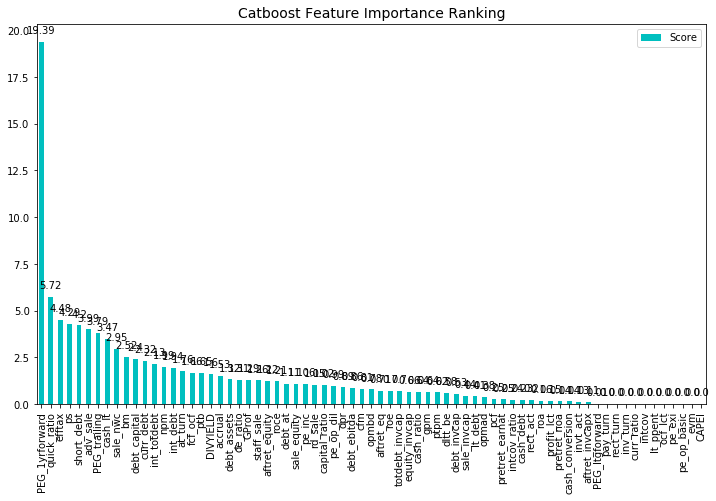

In [74]:
plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

# get feature score as labels round to 2 decimal
labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()